<a href="https://colab.research.google.com/github/jcj217-mc/Data_201_Project_2/blob/main/Data_201_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Decision Tree on Firefighter Dataset**

In [622]:
# Importing Packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE

#### **Decision Tree for Classification**

We will use decision trees to classify the age of firefighter death as under 50 or over 50.

In [623]:
# Import data
data = pd.read_csv('firefighter.csv')
data.head()

First Name    Last Name Age  ... Emergency     Property Type Unnamed: 13
0     Robert      Pollard  64  ...       Yes  Outdoor Property         NaN
1        Lee        Purdy  57  ...       Yes       Residential         NaN
2     Ronald      Osadacz  36  ...       Yes       Street/Road         NaN
3      Allen     Streeter  58  ...       Yes  Outdoor Property         NaN
4       Gary  Bankert, Sr  37  ...        No               NaN         NaN

[5 rows x 14 columns]

In [624]:
data.shape

(2005, 14)

In [625]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   First Name        2005 non-null   object
 1   Last Name         2004 non-null   object
 2   Age               1646 non-null   object
 3   Rank              1998 non-null   object
 4   Classification    2002 non-null   object
 5   Date of Incident  2004 non-null   object
 6   Date of Death     2005 non-null   object
 7   Cause Of Death    1995 non-null   object
 8   Nature Of Death   2002 non-null   object
 9   Duty              2002 non-null   object
 10  Activity          1996 non-null   object
 11  Emergency         2005 non-null   object
 12  Property Type     1800 non-null   object
 13  Unnamed: 13       1 non-null      object
dtypes: object(14)
memory usage: 219.4+ KB


In [626]:
data.isnull().sum()

First Name             0
Last Name              1
Age                  359
Rank                   7
Classification         3
Date of Incident       1
Date of Death          0
Cause Of Death        10
Nature Of Death        3
Duty                   3
Activity               9
Emergency              0
Property Type        205
Unnamed: 13         2004
dtype: int64

In [627]:
# Delete Unnamed: 13 column with majority of null information
data = data.drop(['Unnamed: 13'], axis=1)

In [628]:
# Drop remaining NaN values
data = data.dropna()

In [629]:
# Check that null values are dropped
data.isnull().sum()

First Name          0
Last Name           0
Age                 0
Rank                0
Classification      0
Date of Incident    0
Date of Death       0
Cause Of Death      0
Nature Of Death     0
Duty                0
Activity            0
Emergency           0
Property Type       0
dtype: int64

In [630]:
data.head(1)

First Name Last Name Age  ...           Activity Emergency     Property Type
0     Robert   Pollard  64  ...  Vehicle Passenger       Yes  Outdoor Property

[1 rows x 13 columns]

In [631]:
data.dtypes

First Name          object
Last Name           object
Age                 object
Rank                object
Classification      object
Date of Incident    object
Date of Death       object
Cause Of Death      object
Nature Of Death     object
Duty                object
Activity            object
Emergency           object
Property Type       object
dtype: object

In [632]:
data.Age.astype(int)

0       64
1       57
2       36
3       58
5       53
        ..
1997    56
1998    43
1999    91
2000    19
2004    28
Name: Age, Length: 1433, dtype: int64

In [633]:
data.head()

First Name Last Name  ... Emergency     Property Type
0     Robert   Pollard  ...       Yes  Outdoor Property
1        Lee     Purdy  ...       Yes       Residential
2     Ronald   Osadacz  ...       Yes       Street/Road
3      Allen  Streeter  ...       Yes  Outdoor Property
5       Juan   De Leon  ...        No      Store/Office

[5 rows x 13 columns]

In [634]:
data.Age.max()

'95'

In [635]:
data.Age.min()

'14'

In [636]:
data.Age.astype(int)

0       64
1       57
2       36
3       58
5       53
        ..
1997    56
1998    43
1999    91
2000    19
2004    28
Name: Age, Length: 1433, dtype: int64

In [637]:
data_agegroup = pd.cut(data.Age.astype(int),bins=[0,19,29,39,49, 59, 69, 79, 89, 99],labels=['10-19','20-29','30-39','40-49','50-59','60-69', '70-79', '80-89','90-99'])
data.insert(3,'Age_Group', data_agegroup)

In [638]:
data.head(5)

First Name Last Name  ... Emergency     Property Type
0     Robert   Pollard  ...       Yes  Outdoor Property
1        Lee     Purdy  ...       Yes       Residential
2     Ronald   Osadacz  ...       Yes       Street/Road
3      Allen  Streeter  ...       Yes  Outdoor Property
5       Juan   De Leon  ...        No      Store/Office

[5 rows x 14 columns]

In [639]:
# Changing Date to datetime
data['Date of Incident'] = pd.to_datetime(data['Date of Incident'])

In [640]:
# Making New Column for Year
data["Year"] = data["Date of Incident"].dt.year

In [641]:
data.head()

First Name Last Name Age  ... Emergency     Property Type  Year
0     Robert   Pollard  64  ...       Yes  Outdoor Property  1999
1        Lee     Purdy  57  ...       Yes       Residential  2000
2     Ronald   Osadacz  36  ...       Yes       Street/Road  2000
3      Allen  Streeter  58  ...       Yes  Outdoor Property  2000
5       Juan   De Leon  53  ...        No      Store/Office  2000

[5 rows x 15 columns]

In [642]:
data.Year.max()

2015

In [643]:
data.Year.min()

1978

In [644]:
data_decade = pd.cut(data.Year.astype(int),bins=[0,1979,1989,1999,2009, 2019],labels=['1970','1980','1990','2000','2010'])
data.insert(3,'Decade', data_decade)

In [645]:
data.head()

First Name Last Name Age  ... Emergency     Property Type  Year
0     Robert   Pollard  64  ...       Yes  Outdoor Property  1999
1        Lee     Purdy  57  ...       Yes       Residential  2000
2     Ronald   Osadacz  36  ...       Yes       Street/Road  2000
3      Allen  Streeter  58  ...       Yes  Outdoor Property  2000
5       Juan   De Leon  53  ...        No      Store/Office  2000

[5 rows x 16 columns]

In [646]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 2004
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   First Name        1433 non-null   object        
 1   Last Name         1433 non-null   object        
 2   Age               1433 non-null   object        
 3   Decade            1433 non-null   category      
 4   Age_Group         1433 non-null   category      
 5   Rank              1433 non-null   object        
 6   Classification    1433 non-null   object        
 7   Date of Incident  1433 non-null   datetime64[ns]
 8   Date of Death     1433 non-null   object        
 9   Cause Of Death    1433 non-null   object        
 10  Nature Of Death   1433 non-null   object        
 11  Duty              1433 non-null   object        
 12  Activity          1433 non-null   object        
 13  Emergency         1433 non-null   object        
 14  Property Type     1433 n

In [647]:
import matplotlib.pyplot as plt
import seaborn as sns


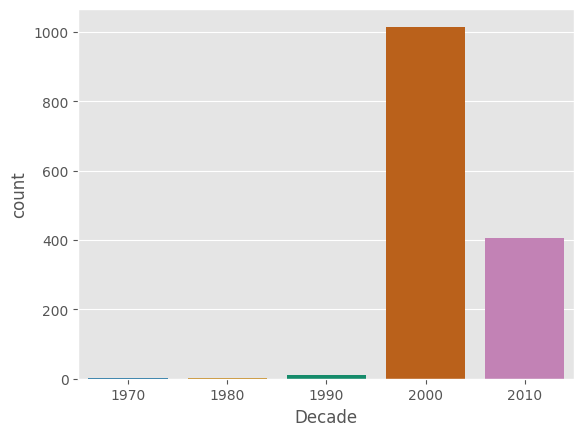

In [648]:
decade_order = ["1970", "1980", "1990", "2000", "2010"]
sns.countplot(x = "Decade", data = data, order = decade_order)

No handles with labels found to put in legend.


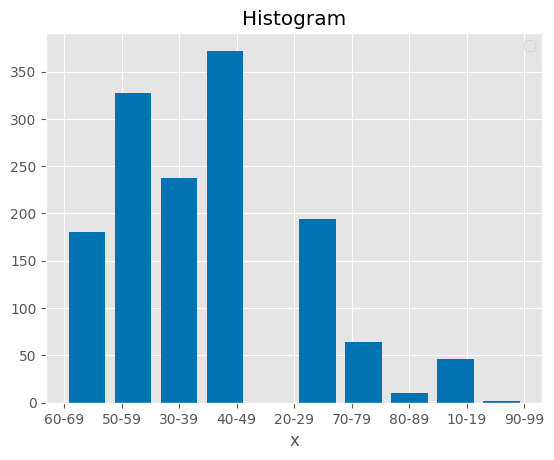

In [649]:
plt.hist(data.Age_Group, histtype='bar', rwidth=0.8)

plt.xlabel('x')
plt.title('Histogram')
plt.legend()
plt.show()

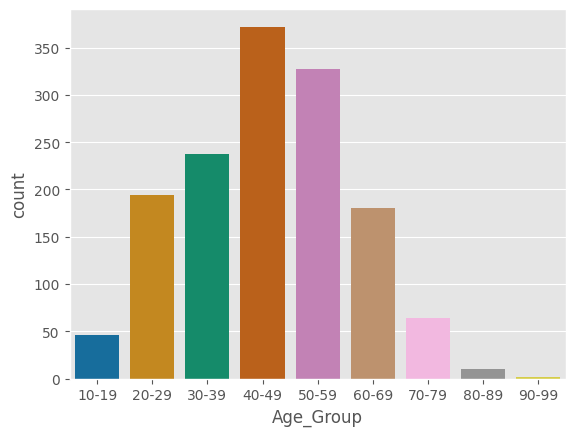

In [650]:
age_order = ["10-19", "20-29", "30-39", "40-49", "50-59", '60-69', '70-79', '80-89', '90-99']
sns.countplot(x = "Age_Group", data = data, order = age_order)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

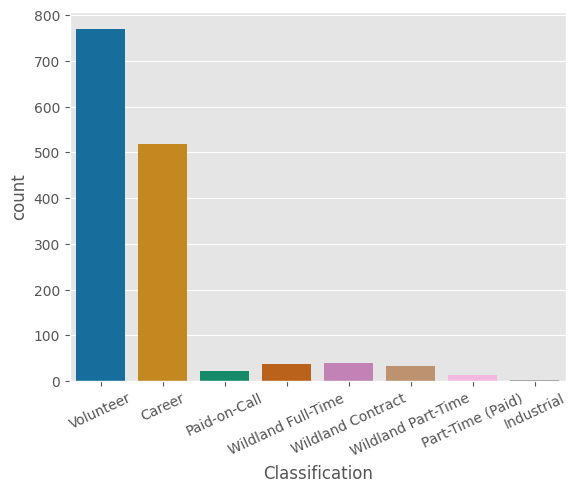

In [651]:
sns.countplot(x = "Classification", data = data)

plt.xticks(rotation = 25)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

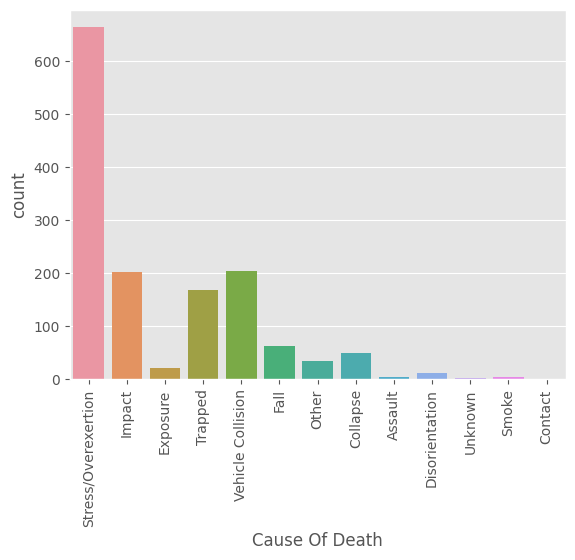

In [652]:
sns.countplot(x = "Cause Of Death", data = data)

plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

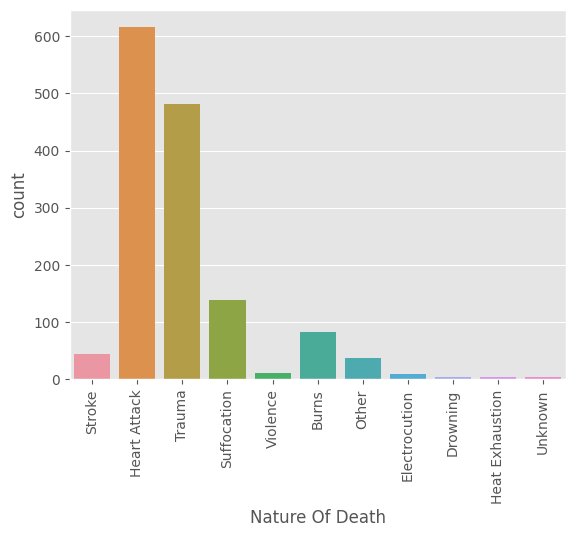

In [653]:
sns.countplot(x = "Nature Of Death", data = data)

plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

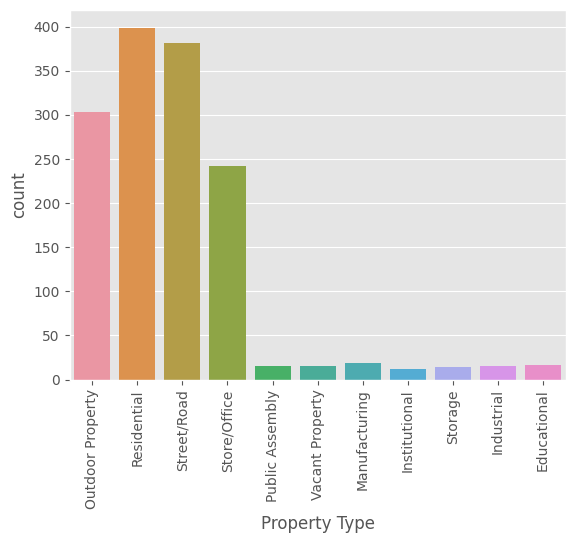

In [654]:
sns.countplot(x = "Property Type", data = data)

plt.xticks(rotation = 90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

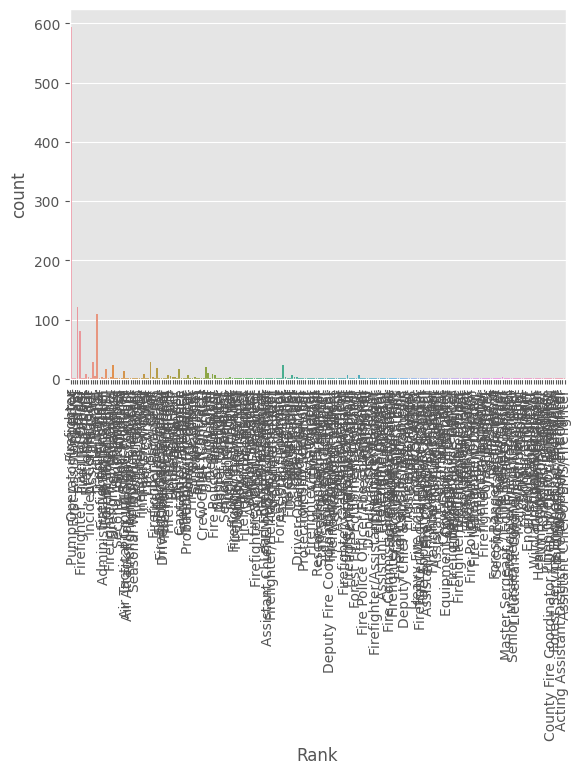

In [655]:
# Too many unique variables to plot
sns.countplot(x = "Rank", data = data)

plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

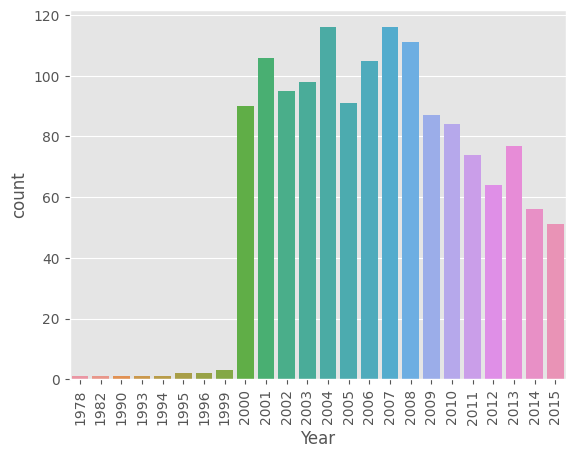

In [656]:
sns.countplot(x = "Year", data = data)

plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

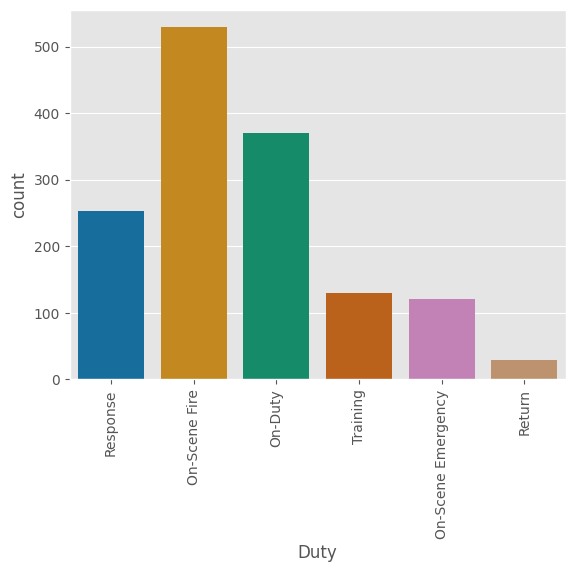

In [657]:
sns.countplot(x = "Duty", data = data)

plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

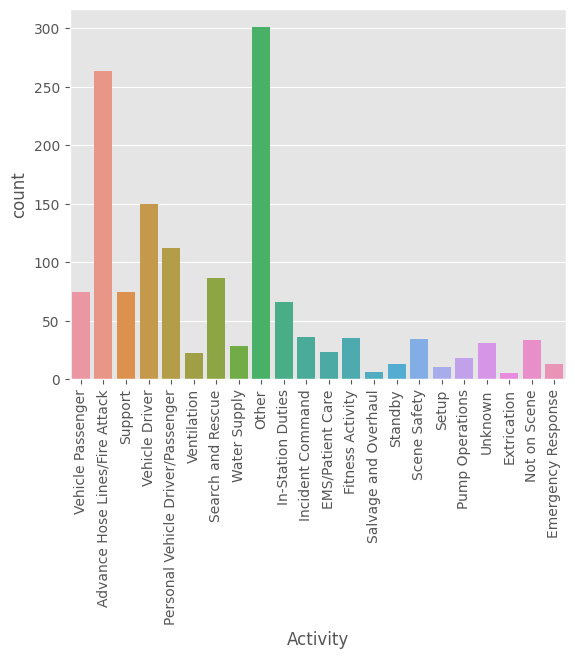

In [658]:
sns.countplot(x = "Activity", data = data)

plt.xticks(rotation = 90)

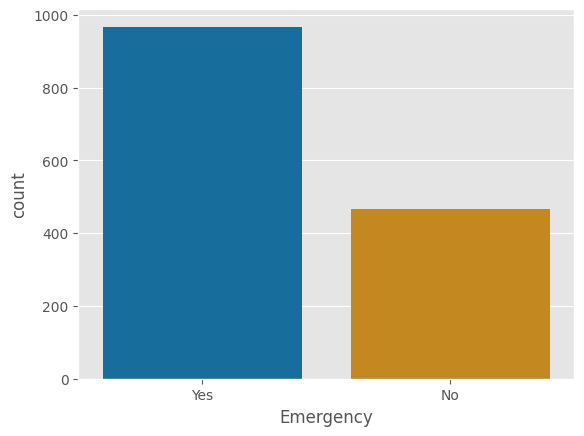

In [659]:
sns.countplot(x = "Emergency", data = data)



In [660]:
data.Decade.value_counts()

2000    1015
2010     406
1990      10
1980       1
1970       1
Name: Decade, dtype: int64

####**Preparing the Data for Decision Tree Analysis**

In [661]:
# Dropping unused columns and the quantitative continuous target column of "Age" and assigning remaining columns to 'x'
# Assigning target column to 'y'
x = pd.DataFrame(data.drop(['First Name', 'Last Name','Age', 'Decade', 'Age_Group'], axis=1))
y = pd.DataFrame(data['Age'])

In [662]:
type(x)

pandas.core.frame.DataFrame

In [663]:
x.head()

Rank Classification  ...     Property Type  Year
0              Firefighter      Volunteer  ...  Outdoor Property  1999
1  Pump Operator/Inspector      Volunteer  ...       Residential  2000
2    First Assistant Chief      Volunteer  ...       Street/Road  2000
3              Firefighter      Volunteer  ...  Outdoor Property  2000
5                  Captain         Career  ...      Store/Office  2000

[5 rows x 11 columns]

In [664]:
x.Classification.unique()

array(['Volunteer', 'Career', 'Paid-on-Call', 'Wildland Full-Time',
       'Wildland Contract', 'Wildland Part-Time', 'Part-Time (Paid)',
       'Industrial'], dtype=object)

In [665]:
x = x.rename(columns = {"Cause Of Death": "Cause", "Nature Of Death": "Nature", "Property Type": "Property", "Date of Incident": "Date_Incident", "Date of Death": "Date_Death"})
x.head(1)

Rank Classification Date_Incident  ... Emergency          Property  Year
0  Firefighter      Volunteer    1999-12-31  ...       Yes  Outdoor Property  1999

[1 rows x 11 columns]

In [666]:
data.Year.dtype

dtype('int64')

##**Have to turn the Categorical entries into numbers with LabelEncoder**

First, Look at how many different unique entries are for each column.

In [667]:
x.Cause.unique()

array(['Stress/Overexertion', 'Impact', 'Exposure', 'Trapped',
       'Vehicle Collision', 'Fall', 'Other', 'Collapse', 'Assault',
       'Disorientation', 'Unknown', 'Smoke', 'Contact'], dtype=object)

In [668]:
x.Nature.unique()

array(['Stroke', 'Heart Attack', 'Trauma', 'Suffocation', 'Violence',
       'Burns', 'Other', 'Electrocution', 'Drowning', 'Heat Exhaustion',
       'Unknown'], dtype=object)

In [669]:
x.Duty.unique()

array(['Response', 'On-Scene Fire', 'On-Duty', 'Training',
       'On-Scene Emergency', 'Return'], dtype=object)

In [670]:
x.Activity.unique()

array(['Vehicle Passenger', 'Advance Hose Lines/Fire Attack', 'Support',
       'Vehicle Driver', 'Personal Vehicle Driver/Passenger',
       'Ventilation', 'Search and Rescue', 'Water Supply', 'Other',
       'In-Station Duties', 'Incident Command', 'EMS/Patient Care',
       'Fitness Activity', 'Salvage and Overhaul', 'Standby',
       'Scene Safety', 'Setup', 'Pump Operations', 'Unknown',
       'Extrication', 'Not on Scene', 'Emergency Response'], dtype=object)

In [671]:
x.Emergency.unique()

array(['Yes', 'No'], dtype=object)

In [672]:
x.Property.unique()

array(['Outdoor Property', 'Residential', 'Street/Road', 'Store/Office',
       'Public Assembly', 'Vacant Property', 'Manufacturing',
       'Institutional', 'Storage', 'Industrial', 'Educational'],
      dtype=object)

**Apply LabelEncoder() from sklearn**

Provides unique qualitative entries with consistent numerical code also known as factorizing categorical data.

In [673]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
x['Activity'] = label.fit_transform(x['Activity']) 
x['Cause'] = label.fit_transform(x['Cause']) 
x['Classification'] = label.fit_transform(x['Classification']) 
x['Duty'] = label.fit_transform(x['Duty']) 
x['Emergency']= label.fit_transform(x['Emergency']) 
x['Nature'] = label.fit_transform(x['Nature']) 
x['Property']= label.fit_transform(x['Property'])
x['Rank'] = label.fit_transform(x['Rank'])

In [674]:
x.head()

Rank  Classification Date_Incident  ... Emergency  Property  Year
0   100               4    1999-12-31  ...         1         4  1999
1   195               4    2000-01-08  ...         1         6  2000
2   150               4    2000-01-11  ...         1         9  2000
3   100               4    2000-01-11  ...         1         4  2000
5    24               0    2000-01-17  ...         0         8  2000

[5 rows x 11 columns]

In [675]:
#Drop the Date columns
x = x.drop(['Date_Incident', 'Date_Death'], axis=1)
x.head()

Rank  Classification  Cause  Nature  ...  Activity  Emergency  Property  Year
0   100               4      9       6  ...        19          1         4  1999
1   195               4      9       3  ...         0          1         6  2000
2   150               4      9       3  ...         0          1         9  2000
3   100               4      9       3  ...         0          1         4  2000
5    24               0      9       3  ...        16          0         8  2000

[5 rows x 9 columns]

In [676]:
# Way to even out subset row number, but instead I removed all NaN's from dataset prior to splitting subsets
#remove_n = 223
#drop_indices = np.random.choice(x.index, remove_n, replace=False)

In [677]:
#drop_indices

In [678]:
#x = x.drop(drop_indices)

In [679]:
x.shape

(1433, 9)

In [680]:
y[0:10]

Age
0   64
1   57
2   36
3   58
5   53
7   47
8   23
9   74
10  59
11  42

#### **Encoding the categorical target variable**

We will encode >50 as 1 and <50 as 0

In [681]:
y.head()

Age
0  64
1  57
2  36
3  58
5  53

The following work with null values is no longer necessary since dealing with the null values at the beginning.

In [682]:
#y.isnull().sum()

In [683]:
#y.dropna()

In [684]:
#y.isnull().sum()

In [685]:
#y = y.apply (pd.to_numeric, errors='coerce')
#y = y.dropna()

In [686]:
#y.isnull().sum()

In [687]:
y.astype(int)

Age
0      64
1      57
2      36
3      58
5      53
...   ...
1997   56
1998   43
1999   91
2000   19
2004   28

[1433 rows x 1 columns]

In [688]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 0 to 2004
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     1433 non-null   object
dtypes: object(1)
memory usage: 62.4+ KB


In [689]:
#Found a more efficient way to apply binary entry for above and below 50 years old
#y = data['Age'].map({>50:1, <50:0})
#y[0:10]

####**Separating Age into Binary >50 and <50**

In [690]:
y = pd.DataFrame(np.where(y.Age.astype(int) >= 50, 1, 0), columns=y.columns)

In [691]:
y.head()

Age
0    1
1    1
2    0
3    1
4    1

In [692]:
# Running linear regression to show not a good fit
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

In [693]:
# R squared
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.0688012518182275


In [694]:
import numpy as np


new_model = LinearRegression().fit(x, y)
print('intercept:', new_model.intercept_)

intercept: [-2.11366492]


In [695]:
print('slope:', new_model.coef_)

slope: [[-0.00046623  0.02166052 -0.00413779 -0.03811527 -0.033711    0.00574686
  -0.00407886  0.01173476  0.00133257]]


In [696]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[0.37515382]
 [0.39453086]
 [0.41700433]
 ...
 [0.40275441]
 [0.3666098 ]
 [0.2528101 ]]


In [697]:
data.head()

First Name Last Name Age  ... Emergency     Property Type  Year
0     Robert   Pollard  64  ...       Yes  Outdoor Property  1999
1        Lee     Purdy  57  ...       Yes       Residential  2000
2     Ronald   Osadacz  36  ...       Yes       Street/Road  2000
3      Allen  Streeter  58  ...       Yes  Outdoor Property  2000
5       Juan   De Leon  53  ...        No      Store/Office  2000

[5 rows x 16 columns]

In [698]:
df = pd.DataFrame(data.drop(['First Name', 'Last Name', 'Decade', 'Age_Group', 'Date of Incident', 'Date of Death'], axis=1))

In [699]:
df = df.rename(columns = {"Cause Of Death": "Cause", "Nature Of Death": "Nature", "Property Type": "Property"})

In [700]:
df.head(1)

Age         Rank Classification  ... Emergency          Property  Year
0  64  Firefighter      Volunteer  ...       Yes  Outdoor Property  1999

[1 rows x 10 columns]

In [701]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
df['Activity'] = label.fit_transform(df['Activity']) 
df['Cause'] = label.fit_transform(x['Cause']) 
df['Classification'] = label.fit_transform(df['Classification']) 
df['Duty'] = label.fit_transform(df['Duty']) 
df['Emergency']= label.fit_transform(df['Emergency']) 
df['Nature'] = label.fit_transform(df['Nature']) 
df['Property']= label.fit_transform(df['Property'])
df['Rank'] = label.fit_transform(df['Rank'])
#df['Age']=label.fit_transform(df['Age'])

In [702]:
df.head(1)

Age  Rank  Classification  Cause  ...  Activity  Emergency  Property  Year
0  64   100               4      9  ...        19          1         4  1999

[1 rows x 10 columns]

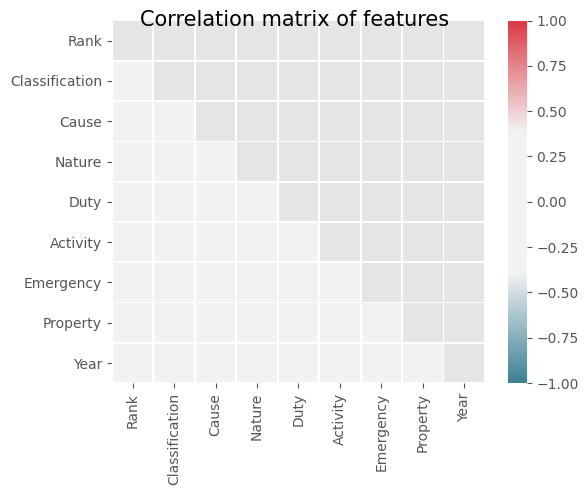

In [703]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
#ax.text(0.77, 0.2, 'a', fontsize=13, ha='center', va='center',
         #transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

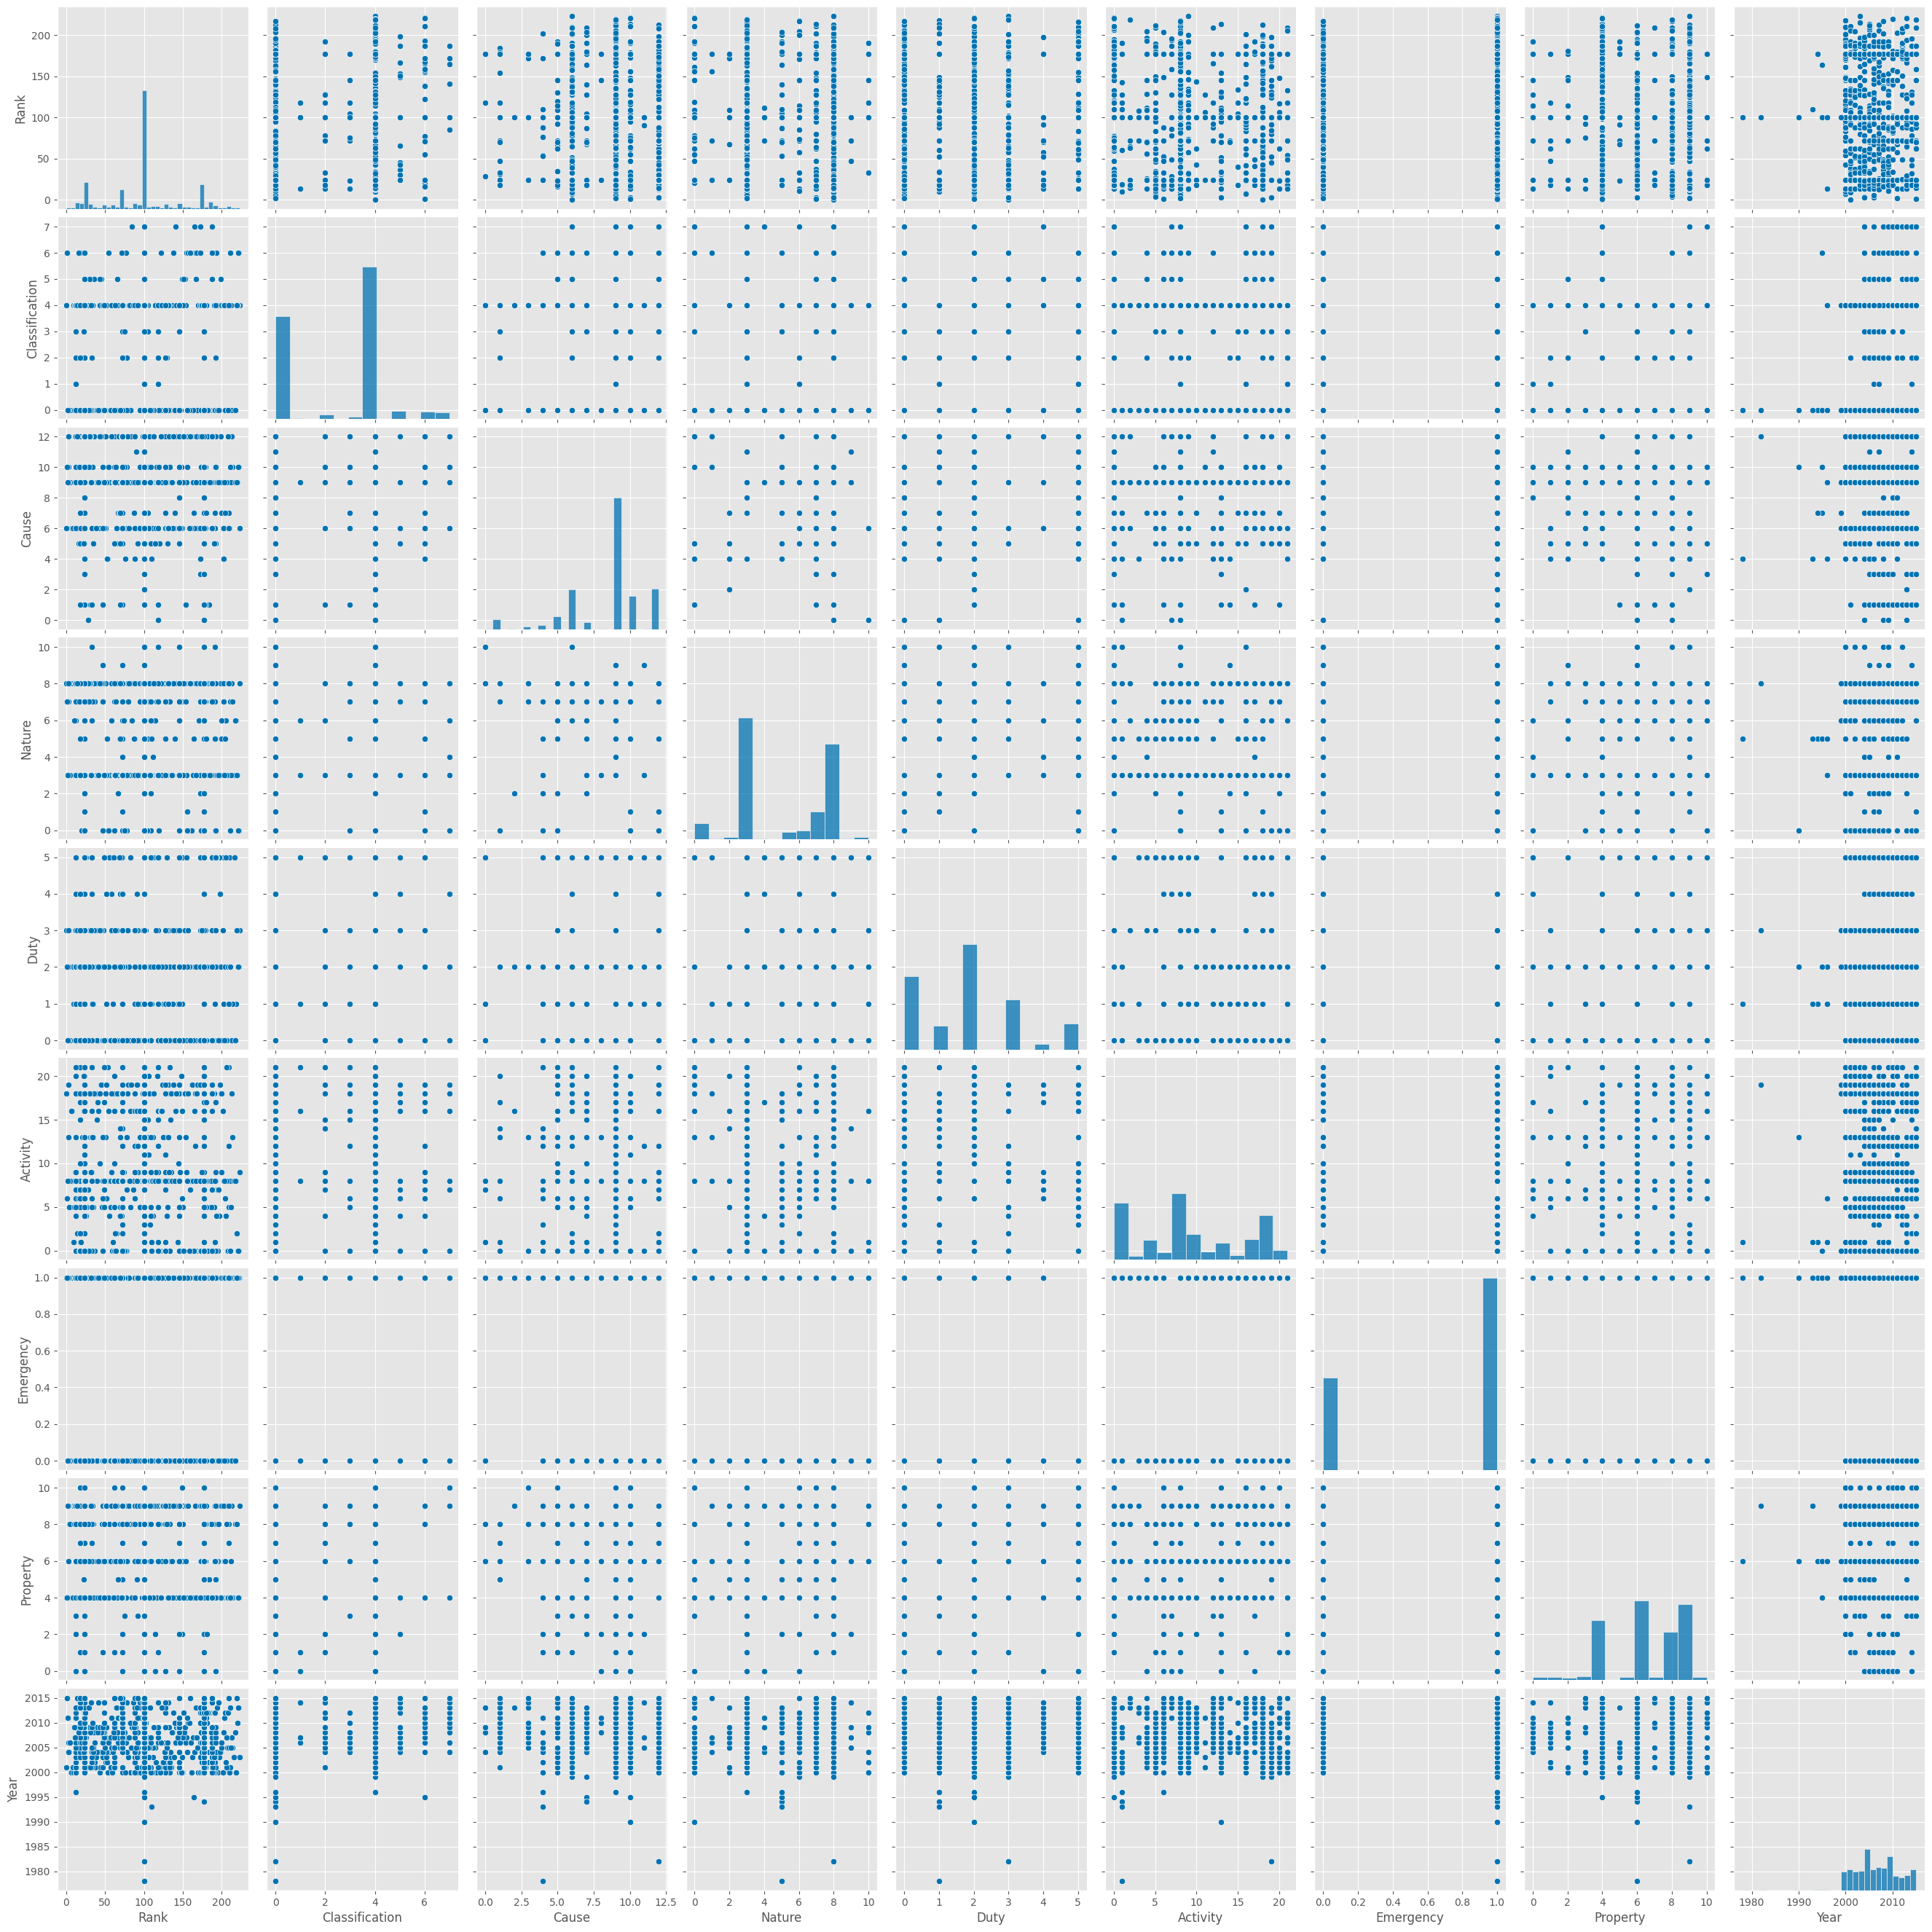

In [704]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df, height=3)

Pearson correlation coefficient matrix of each variables:
                     Year  Property  ...  Classification      Rank
Year            1.000000 -0.041665  ...        0.140927 -0.005412
Property       -0.041665  1.000000  ...       -0.057150 -0.059758
Emergency      -0.038478  0.007172  ...        0.117530  0.025127
Activity       -0.121197  0.131683  ...        0.068810 -0.040590
Duty           -0.077667 -0.064352  ...        0.053324  0.008770
Nature         -0.069176  0.152638  ...       -0.051281  0.058580
Cause           0.092211 -0.017506  ...        0.133021 -0.000419
Classification  0.140927 -0.057150  ...        1.000000 -0.027731
Rank           -0.005412 -0.059758  ...       -0.027731  1.000000

[9 rows x 9 columns]


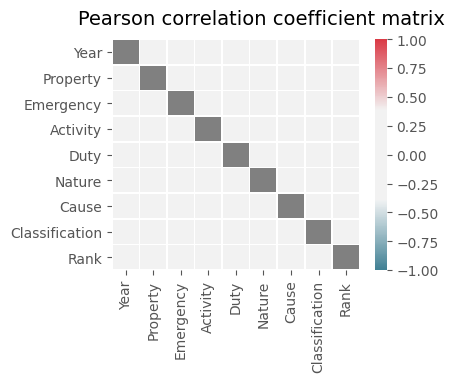

In [705]:

corr = df[['Year', 'Property', 'Emergency', 'Activity', 'Duty','Nature','Cause','Classification','Rank','Age']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

In [709]:
import statsmodels.api as sm
X = df[['Classification', 'Nature']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df.Age.astype(int), X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     50.63
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           5.71e-22
Time:                        16:55:23   Log-Likelihood:                -5837.4
No. Observations:                1433   AIC:                         1.168e+04
Df Residuals:                    1430   BIC:                         1.170e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             52.1624      0.967     53.

In [710]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.06612384821379935


In [711]:
#F-Test(ANOVA)
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 50.6261471421431
Probability of observing value at least as high as F-statistic: 5.712665706093721e-22


In [712]:
print(olsmod.pvalues)

const             0.000000e+00
Classification    1.116939e-01
Nature            3.717731e-22
dtype: float64


In [721]:
df.Age.astype(float)

0       64.0
1       57.0
2       36.0
3       58.0
5       53.0
        ... 
1997    56.0
1998    43.0
1999    91.0
2000    19.0
2004    28.0
Name: Age, Length: 1433, dtype: float64

In [722]:
df['age_pred'] = olsmod.predict(X)
df['residual'] = olsmod.resid
df.head()

Age  Rank  Classification  Cause  ...  Property  Year   age_pred   residual
0  64   100               4      9  ...         4  1999  44.875139  19.124861
1  57   195               4      9  ...         6  2000  49.090740   7.909260
2  36   150               4      9  ...         9  2000  49.090740 -13.090740
3  58   100               4      9  ...         4  2000  49.090740   8.909260
5  53    24               0      9  ...         8  2000  47.946844   5.053156

[5 rows x 12 columns]

In [723]:
df.age_pred.dtype

dtype('float64')

In [725]:
print(df.Age.dtype)
print(df.age_pred.dtype)

object
float64


In [727]:
df.Age.astype(float)

0       64.0
1       57.0
2       36.0
3       58.0
5       53.0
        ... 
1997    56.0
1998    43.0
1999    91.0
2000    19.0
2004    28.0
Name: Age, Length: 1433, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


TypeError: ignored

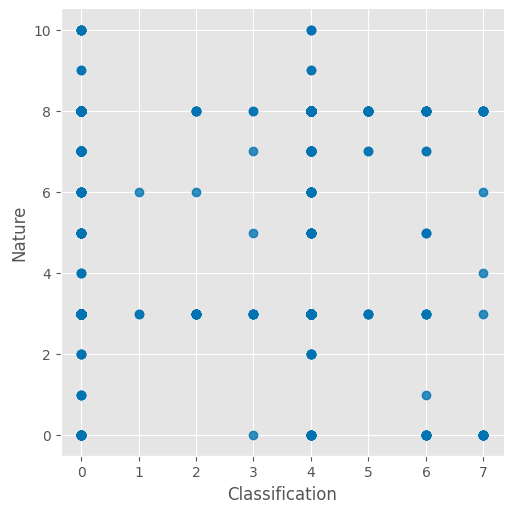

In [730]:
# Plotting the observed vs predicted values
sns.lmplot(x='Classification', y='Nature', data=df, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df[['Age', 'age_pred']].min().min()-10, 
                        df[['Age', 'age_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Age', fontsize=14)
plt.xlabel('Actual Age', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

In [731]:
# Durbin-Watson autocorrelation of the errors(residuals) over time
# Code source: https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.7984445015509054
Little to no autocorrelation 

Assumption satisfied


#### **Decision Criteria**

In [732]:
# Split datset into training set and test set
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=0.2,random_state=99)

# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion='entropy', random_state=99)

In [733]:
# Train Decision Tree Classifier
clf.fit(x_train,y_train)

# Predict the response for test dataset
y_pred= clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
accuracy_score(y_test, y_pred)

0.6202090592334495

We got a classification rate of 62%.  We can improve the accuracy by tuning the parameters in the Decision Tree Algorithm.

In [734]:
y_pred=y_pred.reshape(287,1)
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
accuracy

0.6202090592334495

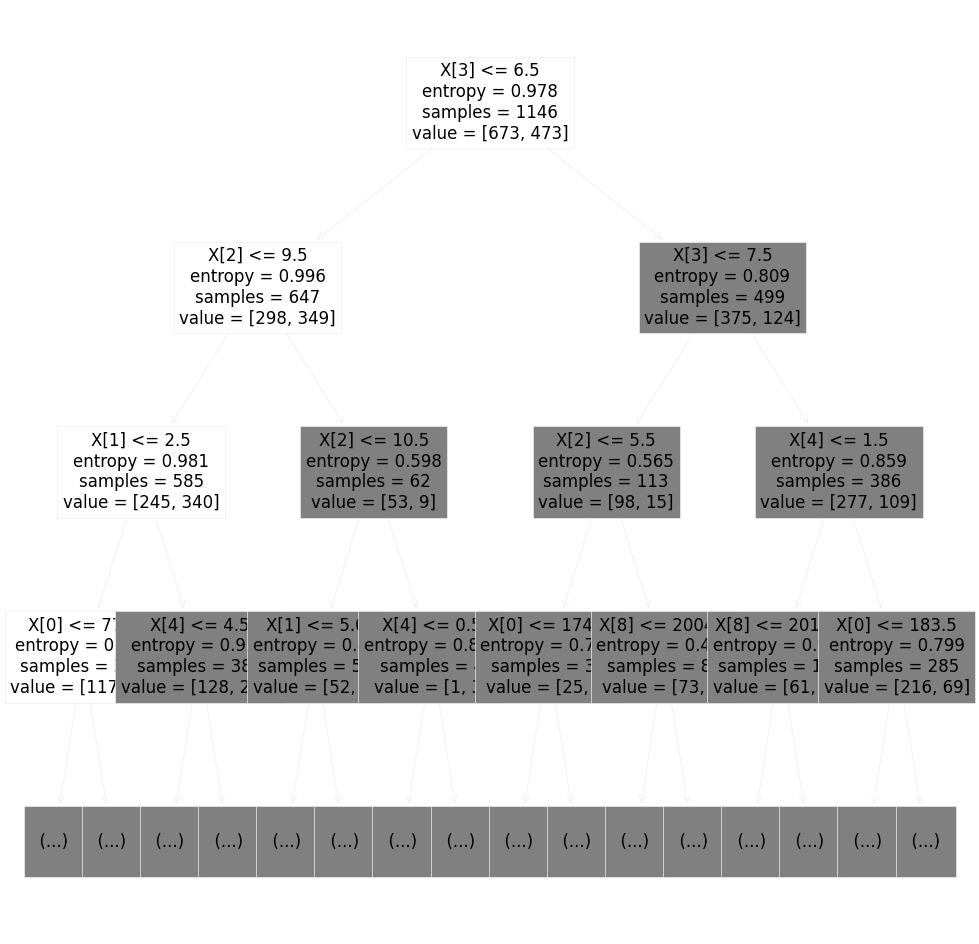

In [735]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=12);

In [736]:
import graphviz
import pydotplus

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
x.head(1)

Rank  Classification  Cause  Nature  ...  Activity  Emergency  Property  Year
0   100               4      9       6  ...        19          1         4  1999

[1 rows x 9 columns]

In [ ]:
# Creating a complete unpruned Decision Tree
# Code sourced from example at https://www.datacamp.com/community/tutorials/decision-tree-classification-python
feature_cols = ['Rank','Classification','Cause','Nature','Duty','Activity','Emergency','Property','Year']

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('firefighter.png')
Image(graph.create_png())

####**Optimizing Decision Tree Performance**

In [172]:
import sklearn.metrics as metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7073170731707317


The classification rate increased to 70.73%, which is better accuracy than the previous model.

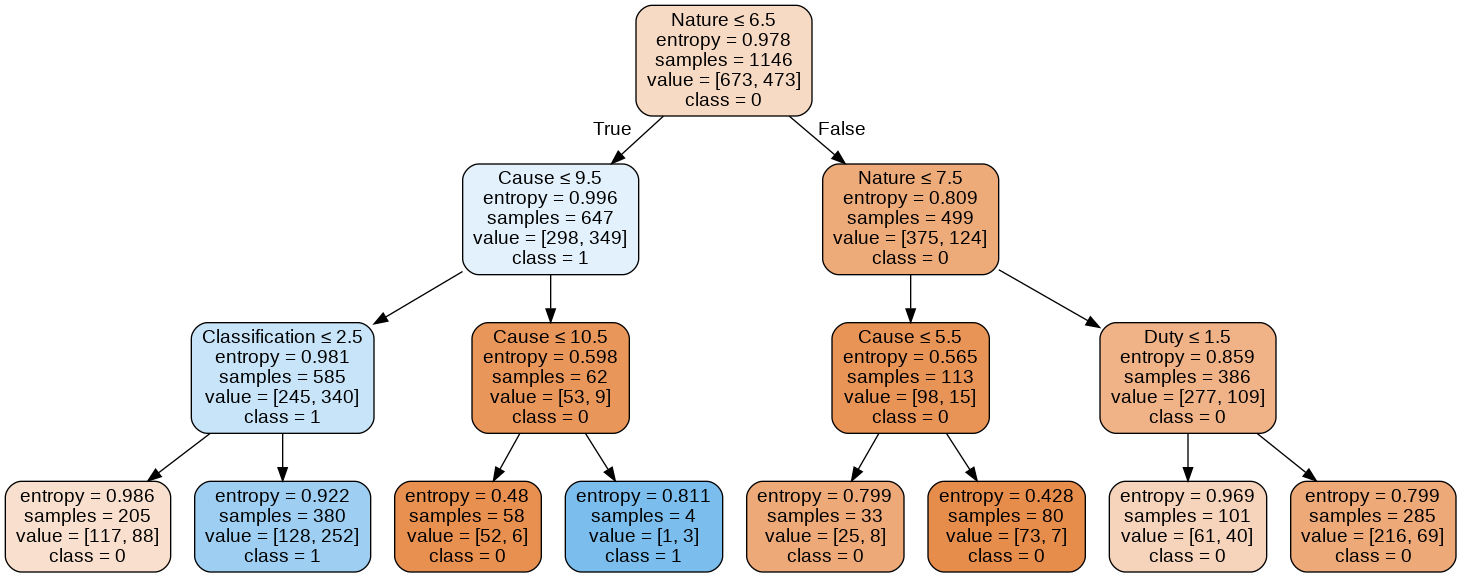

In [173]:
# Optimized and Pruned Decision Tree Visualization

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('firefighter2.png')
Image(graph.create_png())

#### **Random Forest**

In [174]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators=100,
                            random_state=11)
rf_cl.fit(x_train, y_train)
rf_pred= rf_cl.predict(x_test)
rf_pred=rf_pred.reshape(287,1)
accuracy = float(np.sum(rf_pred==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


accuracy: 0.682927


The Random Forest Classifier created a classification rate of 68.29% which is an improvement of the initial rate but slightly less effective than the most recent optimization code.

#### **XG Boost**

In [175]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=10, n_estimators=20, seed=99) 
xg_cl.fit(x_train, y_train)
preds = xg_cl.predict(x_test)
preds=preds.reshape(287,1)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.693380


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The XGBoost Classifier created a classification rate of 69.34% which is an improvement from the Random Forrest Classifier but slightly less effective than the metrics optimization code with 70.73% accuracy.

#### **Cross-Validation**

In [176]:
# DMatrix is a internal data structure that used is by XGBoost 
# which is optimized for both memory efficiency and training speed
data_dmatrix = xgb.DMatrix(data=x,label=y) 
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=4,num_boost_round=10, metrics="error", as_pandas=True) 
print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

Accuracy: 0.706916


The DMatrix created a classification rate of 70.69% which is an improvement from the XGBoost Classifier but slightly less effective than the metrics optimization code with 70.73% accuracy.

####**Decision-Tree for Regression**

In [177]:
# Regression-Tree
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Import train_test_split
from sklearn.model_selection import train_test_split

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as mean_squared_error

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

#Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)


In [178]:
# Fit 'dt' to the training-set
dt.fit(X_train, y_train)

# Predict test-set labels
y_pred = dt.predict(X_test)

# Compute test-set RMSE
mse_dt = MSE(y_test, y_pred)

# Compute test-set RMSE
rmse_dt = mse_dt** (1/2)

# Print rmse_dt
print(rmse_dt)

0.45287284124546956


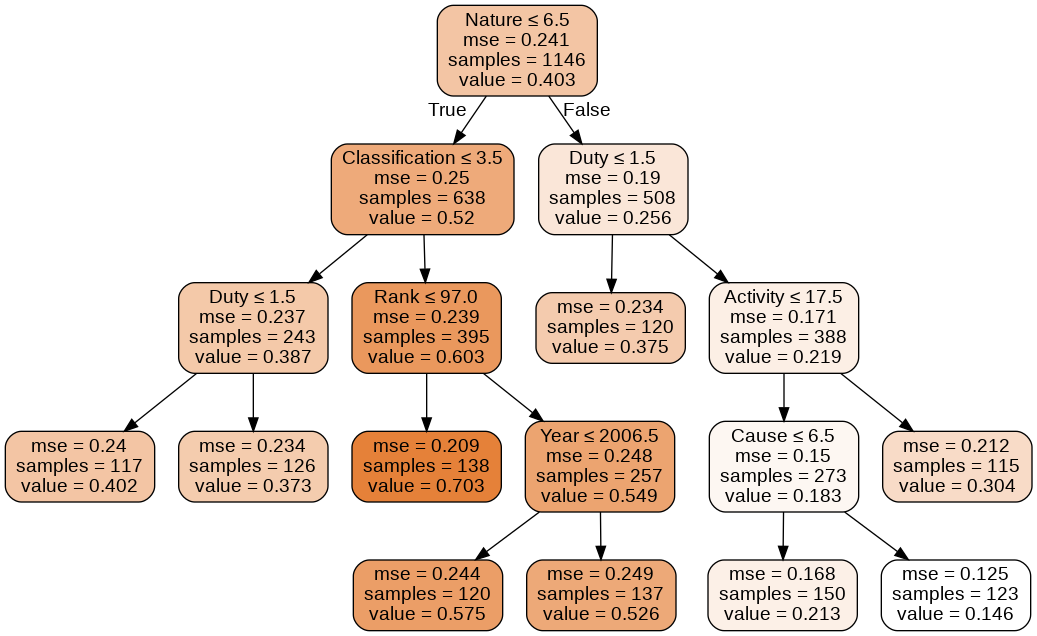

In [180]:
# Visualizing Regression Tree
# from DataCamp slides on Machine Learning with Tree-Based Models in Python
# to minimize error in particular region
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('firefighter3.png')
Image(graph.create_png())

####**Summary Pros and Cons of Decision Trees**
Sourced from: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

**Pros**

*   Decision trees are easy to interpret and visualize.
*   It can easily capture Non-linear patterns.
*   It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
*   It can be used for feature engineering such as predicting missing values, suitable for variable selection.
*   The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)
*   Can be mixed mode variables with ease - categorial and numerical (from: https://www.youtube.com/watch?v=gYSWrUP4aB0)

**Cons**

*   Sensitive to noisy data. It can overfit noisy data.
*   The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
*   Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.





